In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [10]:
model = sm.Unet('efficientnetb2', classes=1, activation='sigmoid')
model.load_weights('models/data_s_200e_b2.h5')

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None))>


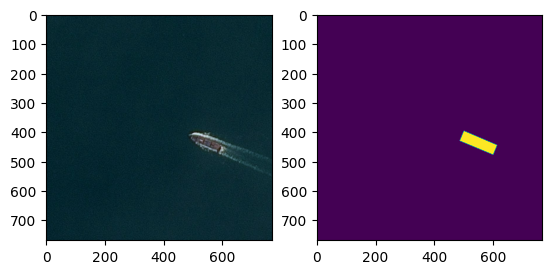

1/1 [==============================] - 0s 210ms/step


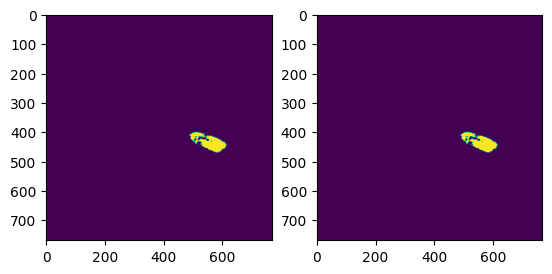

In [13]:
# FIXME: reuse from train

data_p_dir = 'data_p/l/'
image_dir = data_p_dir + 'image/'
label_dir = data_p_dir + 'label/'

image_file_paths = tf.data.Dataset.list_files(image_dir + '*.jpg', shuffle=False)
label_file_paths = tf.data.Dataset.list_files(label_dir + '*.jpg', shuffle=False)

def process_img(path):
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.cast(img, tf.float32) / 255.
    return img

def process_label(path):
    mask = tf.io.read_file(path)
    img = tf.io.parse_tensor(mask, out_type=tf.float32)
    return img

def process_batch(image, label):
    X = process_img(image)
    y = process_label(label)
    return X, y

def plot_ds_element_overlay(background, overlay):
    fig, ax = plt.subplots()
    plt.imshow(background)
    ax.imshow(overlay, alpha=0.3)

def plot_ds_element(background, overlay):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(background)
    axs[1].imshow(overlay)
    plt.show()

d = tf.data.Dataset.zip((image_file_paths, label_file_paths)).map(process_batch)

SKIP = 101
item = d.batch(1).skip(SKIP).take(1)
print(item)

for i, l in item:
    plot_ds_element(i[0], l[0])

for i, l in item:
    p = model.predict(i)
    plot_ds_element(p[0], p[0])